In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Ugnjezdena unakrsna validacija

In [9]:
np.random.seed(10)

In [10]:
%store -r X_final
%store -r y_final

In [11]:
#izbacicujemo redove u kojima ima nedostajucih vrednosti
rows_to_remove = X_final[X_final.isna().any(axis=1)].index
rows_to_remove.shape

(912,)

In [12]:
X = X_final.drop(index=rows_to_remove)
y = y_final.drop(index=rows_to_remove)
X = X.astype('float64')
X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)
print('Nakon izbacivanja redova sa nedostajucim vrednostima: ', X.shape, y.shape)

Nakon izbacivanja redova sa nedostajucim vrednostima:  (4998, 58) (4998,)


### Parametrizovani svm

In [13]:
def parameterized_svm(X, y):
    grid_model = pipeline.Pipeline(steps=[('scaler', preprocessing.StandardScaler()), ('svm', SVC())])
    
    params = {
        'svm__C': [10**i for i in range(-3, 3)], 
        'svm__gamma': [10**i for i in range(-2, 2)]
        }
    
    scores = model_selection.cross_val_score(model_selection.GridSearchCV(\
                        grid_model, param_grid=params, scoring='accuracy', cv=3, verbose=1),\
                        X, y, scoring='accuracy', cv=3, verbose=1)
    
    return scores

In [14]:
scores_svm = parameterized_svm(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   46.3s finished


In [15]:
print("Minimalna tacnost: %f\nMaksimalna tacnost: %f\nSrednja vrednost: %f" % (np.min(scores_svm), np.max(scores_svm), np.mean(scores_svm)))

Minimalna tacnost: 0.962185
Maksimalna tacnost: 0.963986
Srednja vrednost: 0.963185


### Slucajne sume

In [16]:
def parameterized_random_forest(X, y):
    param_grid2 = {
        'classifier__n_estimators': [200, 500],
        'classifier__max_depth' : [4,5,6,7,8],
        'classifier__criterion' :['gini', 'entropy']
        }
    
    grid_search = model_selection.GridSearchCV(\
                            pipeline.Pipeline(steps=[('scaler', preprocessing.StandardScaler()),\
                                                     ('classifier', RandomForestClassifier())]), \
                                               param_grid=param_grid2, scoring='accuracy', cv=3, n_jobs=6, verbose=1)
    
    scores = model_selection.cross_val_score(grid_search, X, y, scoring='accuracy', cv=3, verbose=1, n_jobs=3)
    
    return scores

In [18]:
scores_forest = parameterized_random_forest(X, y)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  2.3min finished


In [19]:
print("Minimalna tacnost: %f\nMaksimalna tacnost: %f\nsrednja vrednost: %f" % (np.min(scores_forest), np.max(scores_forest), np.mean(scores_forest)))

Minimalna tacnost: 0.960984
Maksimalna tacnost: 0.965786
srednja vrednost: 0.963185


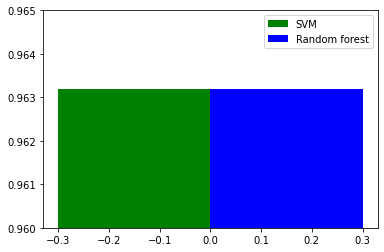

In [20]:
plt.bar(-0.15, scores_svm.mean(), color='green', width=0.3, label='SVM')
plt.bar(0.15, scores_forest.mean(), color='blue', width=0.3, label='Random forest')
plt.legend()

plt.ylim(0.96, 0.965)

plt.show()